In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

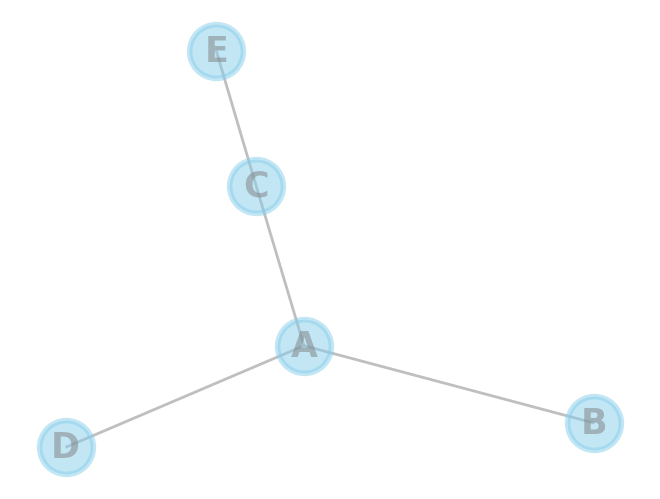

In [5]:
# 시작과 끝을 dataframe으로 만들기
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
 
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
nx.draw(G, with_labels=True, 
        node_size=1500, 
        node_color="skyblue", 
        node_shape="o", 
        alpha=0.5, 
        linewidths=4, 
        font_size=25, 
        font_color="grey", 
        font_weight="bold", 
        width=2, 
        edge_color="grey")
plt.show()

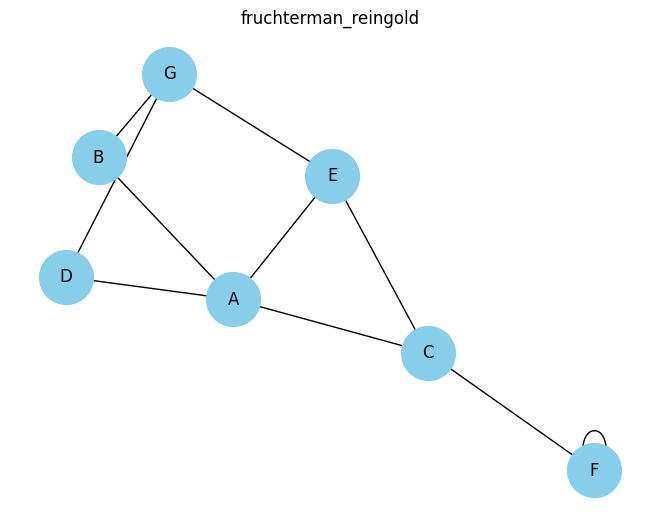

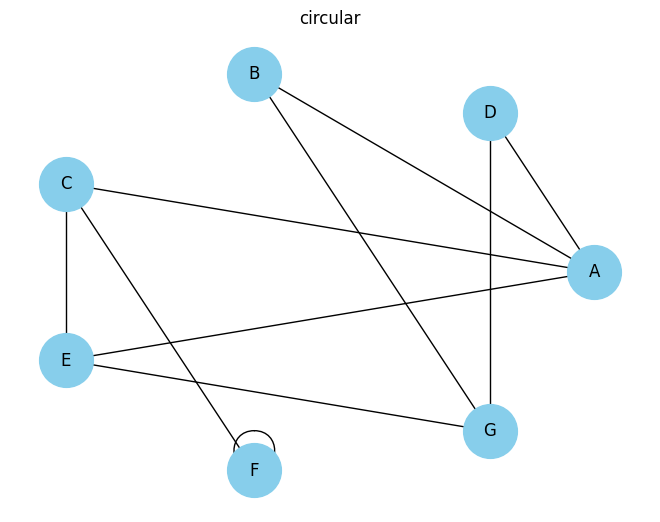

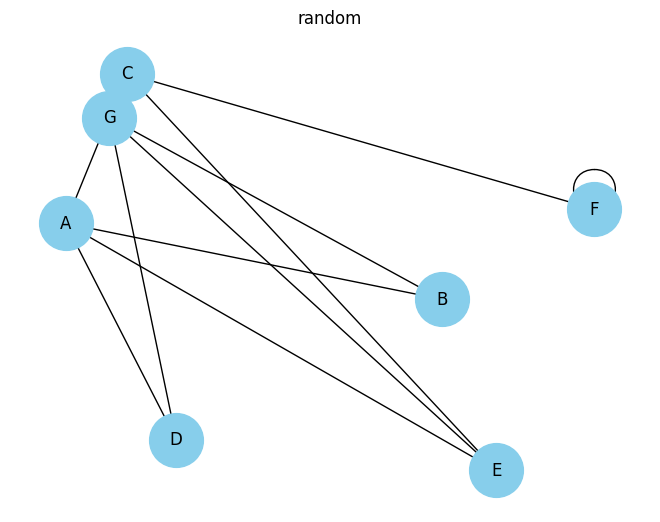

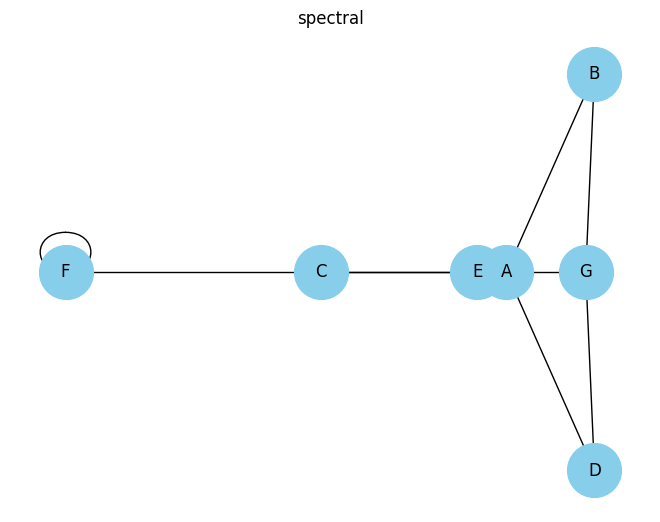

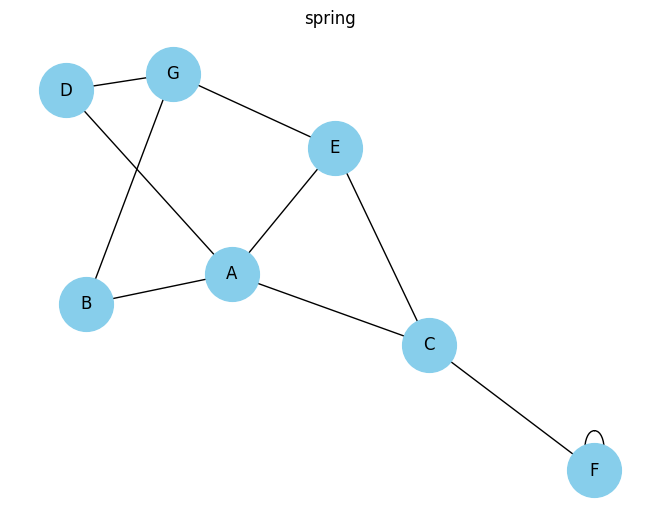

In [6]:
df = pd.DataFrame({ 'from':['A', 'B', 'C','A','E','F','E','G','G','D','F'], 'to':['D', 'A', 'E','C','A','F','G','D','B','G','C']})
 
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Fruchterman Reingold
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.fruchterman_reingold_layout(G))
plt.title("fruchterman_reingold")
plt.show()
 
# Circular
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.circular_layout(G))
plt.title("circular")
plt.show()
 
# Random
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.random_layout(G))
plt.title("random")
plt.show()
 
# Spectral
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.spectral_layout(G))
plt.title("spectral")
plt.show()
 
# Spring
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.spring_layout(G))
plt.title("spring")
plt.show()

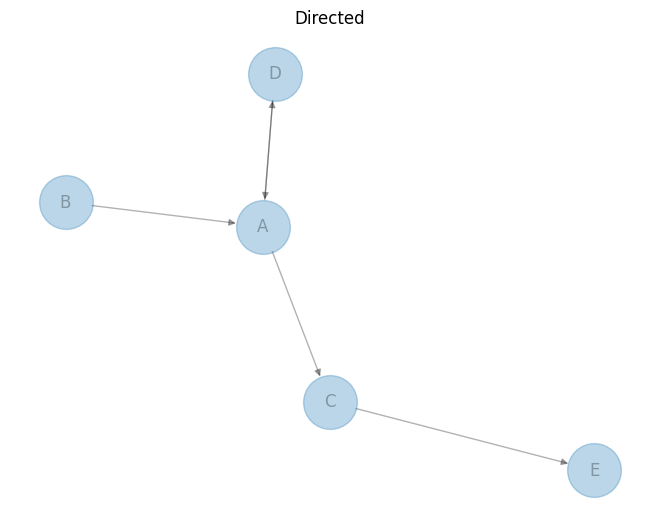

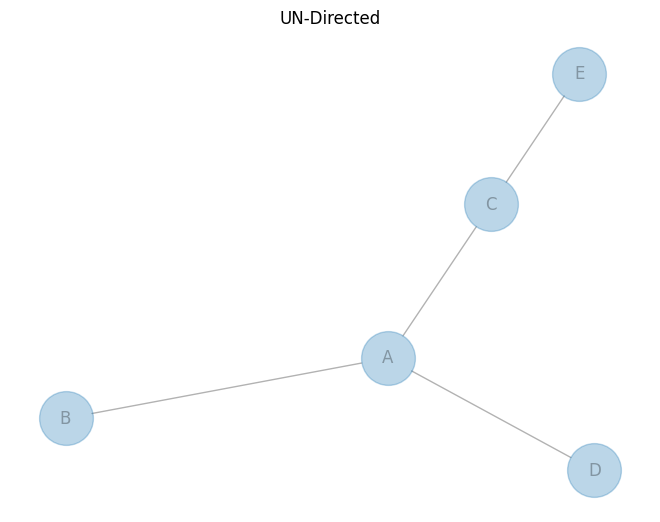

In [8]:
df = pd.DataFrame({ 'from':['D', 'A', 'B', 'C','A'], 'to':['A', 'D', 'A', 'E','C']})

# 화살표 그리기
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )
 
nx.draw(G, with_labels=True, node_size=1500, alpha=0.3, arrows=True)
plt.title("Directed")
plt.show()

df = pd.DataFrame({ 'from':['D', 'A', 'B', 'C','A'], 'to':['A', 'D', 'A', 'E','C']})
 
# 화살표 x
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
nx.draw(G, with_labels=True, node_size=1500, alpha=0.3, arrows=True)
plt.title("UN-Directed")
plt.show()

In [12]:
from netgraph import Graph

In [13]:
partition_sizes = [10, 20, 30, 40]
g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)

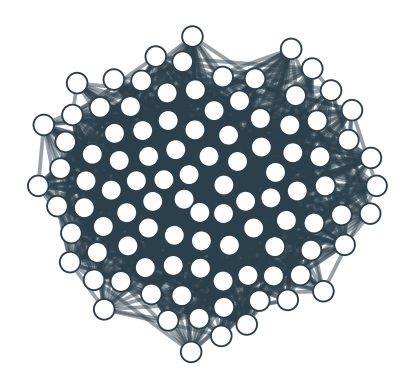

In [14]:
%%capture --no-display
Graph(g)

In [15]:
node_to_community = dict()
node = 0
for community_id, size in enumerate(partition_sizes):
    for _ in range(size):
        node_to_community[node] = community_id
        node += 1

community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
}
node_color = {node: community_to_color[community_id] for node, community_id in node_to_community.items()}

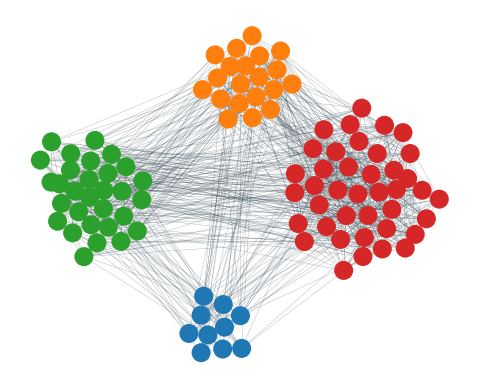

In [16]:
fig, ax = plt.subplots()
Graph(g,
      node_color=node_color,
      node_edge_width=0,
      edge_width=0.1,
      edge_alpha=0.5,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      ax=ax,
)
plt.show()

,from,to,value
0,A,D,typeA
1,B,A,typeA
2,C,E,typeB
3,A,C,typeB


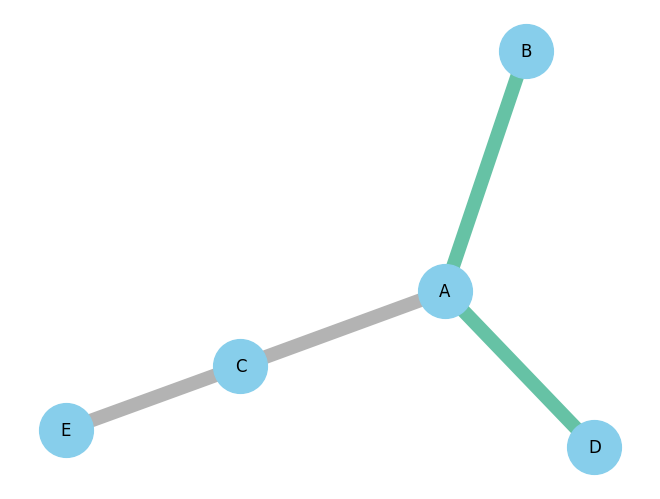

In [11]:
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C'], 'value':['typeA', 'typeA', 'typeB', 'typeB']})
 
df['value']=pd.Categorical(df['value'])
df['value'].cat.codes
 
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
display(df)

nx.draw(G, 
        with_labels=True, 
        node_color='skyblue', 
        node_size=1500, 
        edge_color=df['value'].cat.codes, 
        width=10.0, 
        edge_cmap=plt.cm.Set2)

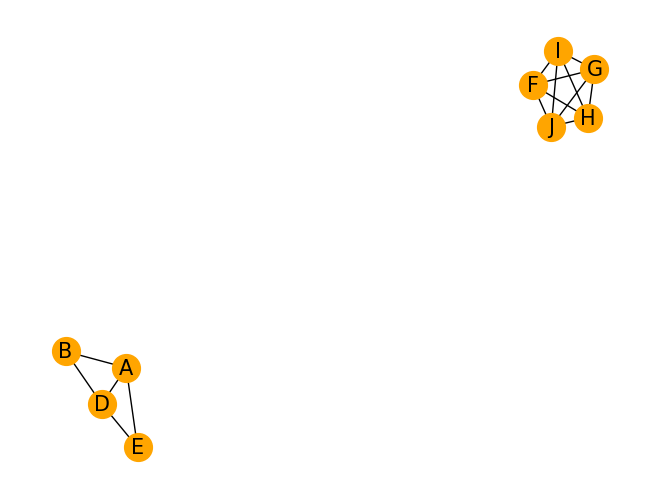

In [9]:
ind1=[5,10,3,4,8,10,12,1,9,4]
ind5=[1,1,13,4,18,5,2,11,3,8]
df = pd.DataFrame({'A':ind1, 
                   'B':ind1 + np.random.randint(10, size=(10)) , 
                   'C':ind1 + np.random.randint(10, size=(10)) , 
                   'D':ind1 + np.random.randint(5, size=(10)) , 
                   'E':ind1 + np.random.randint(5, size=(10)), 
                   'F':ind5, 
                   'G':ind5 + np.random.randint(5, size=(10)), 
                   'H':ind5 + np.random.randint(5, size=(10)), 
                   'I':ind5 + np.random.randint(5, size=(10)), 
                   'J':ind5 + np.random.randint(5, size=(10))})
 
# 상관관계 계산
corr = df.corr()
 
links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']
 
links_filtered=links.loc[ (links['value'] > 0.8) & (links['var1'] != links['var2']) ]

G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)